<a href="https://colab.research.google.com/github/Pratikpatil19/yolo-model-testing_01/blob/main/32_v10_L_200_16_Adam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **RUN**

In [1]:
!nvidia-smi

Tue Dec 10 12:22:16 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off | 00000000:00:04.0 Off |                    0 |
| N/A   31C    P0              44W / 400W |      2MiB / 40960MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/Combinations/32

/content/drive/MyDrive/Combinations/32


In [4]:
import os
HOME = os.getcwd()
print(HOME)

/content/drive/MyDrive/Combinations/32


# no run

In [ ]:
!pip install -q git+https://github.com/THU-MIG/yolov10.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
!pip install -q supervision roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.6 MB/s eta 0:00:00


In [ ]:
!mkdir -p {HOME}/weights
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10m.pt
!ls -lh {HOME}/weights

total 64M
-rw------- 1 root root 64M May 26 15:54 yolov10m.pt


# Run Again

In [5]:
import os
HOME = os.getcwd()
print(HOME)

/content/drive/MyDrive/Combinations/32


In [ ]:
%cd {HOME}

# Start training YOLOv10 model with the specified parameters
# optimizer=SGD (temporarily disabled)
!yolo task=detect mode=train \
    epochs=300 batch=32 \
    device=0 optimizer=Adam patience=300 \
    model=/content/drive/MyDrive/Combinations/32/weights/yolov10m.pt \
    data=/content/drive/MyDrive/Data_set/large/data_large.yaml




/content/drive/MyDrive/Combinations/32
/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:733: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(f

In [6]:
!ls /content/drive/MyDrive/Combinations/32/runs/detect/train

args.yaml					    R_curve.png		 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1732293209.4eea80de36dc.1677.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	 val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2.jpg	 val_batch2_pred.jpg
labels.jpg					    train_batch5220.jpg  weights
P_curve.png					    train_batch5221.jpg
PR_curve.png					    train_batch5222.jpg


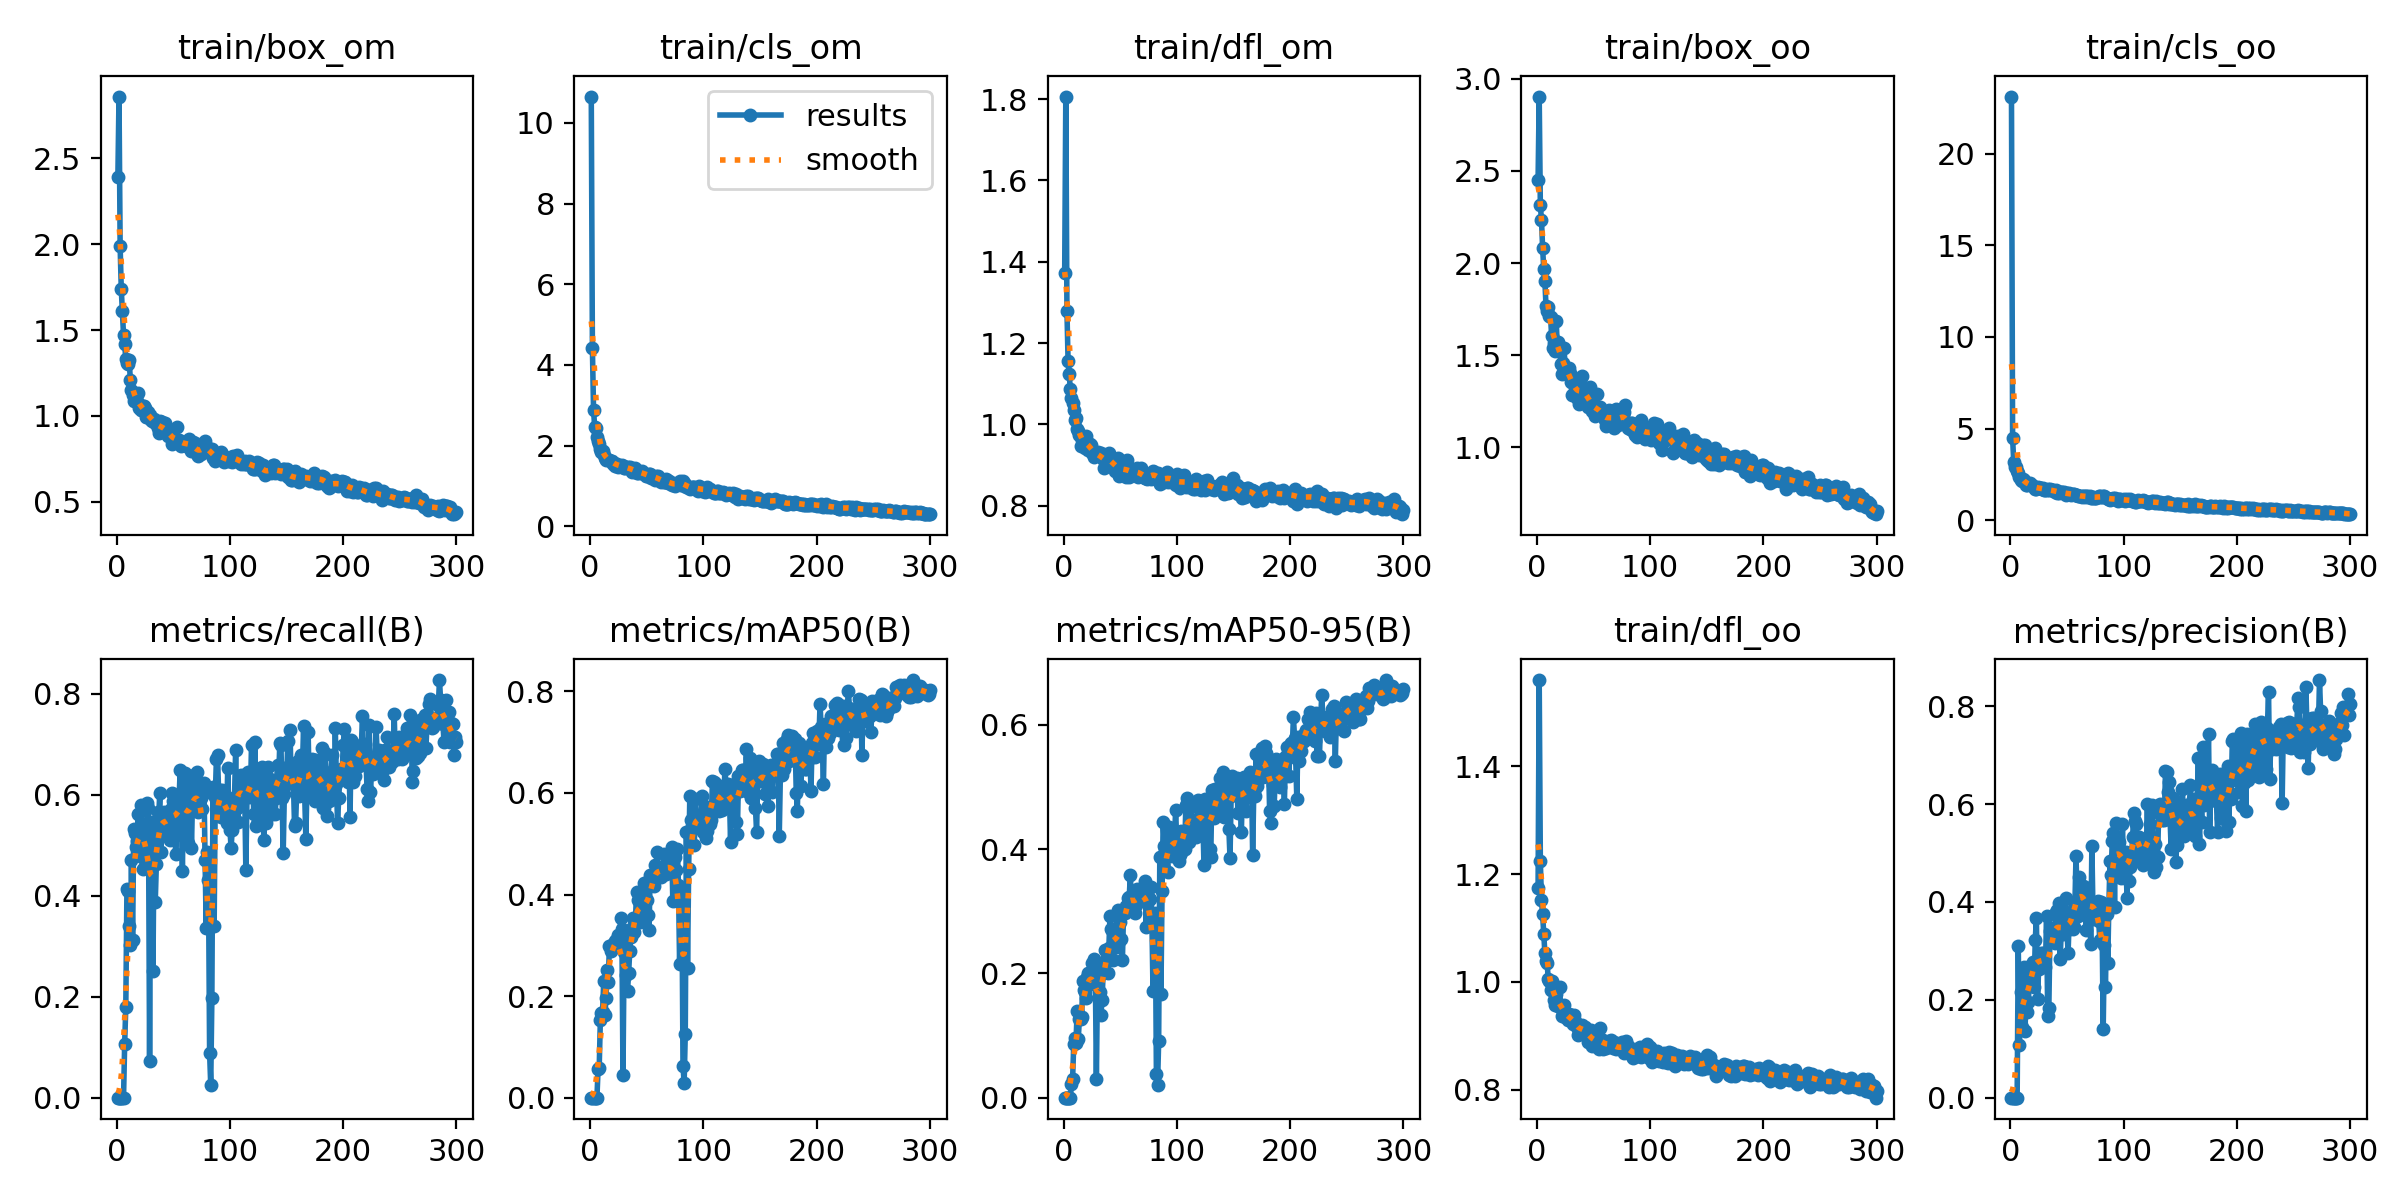

In [7]:
from IPython.display import Image

Image(filename=f"/content/drive/MyDrive/Combinations/32/runs/detect/train/results.png", width=1000)

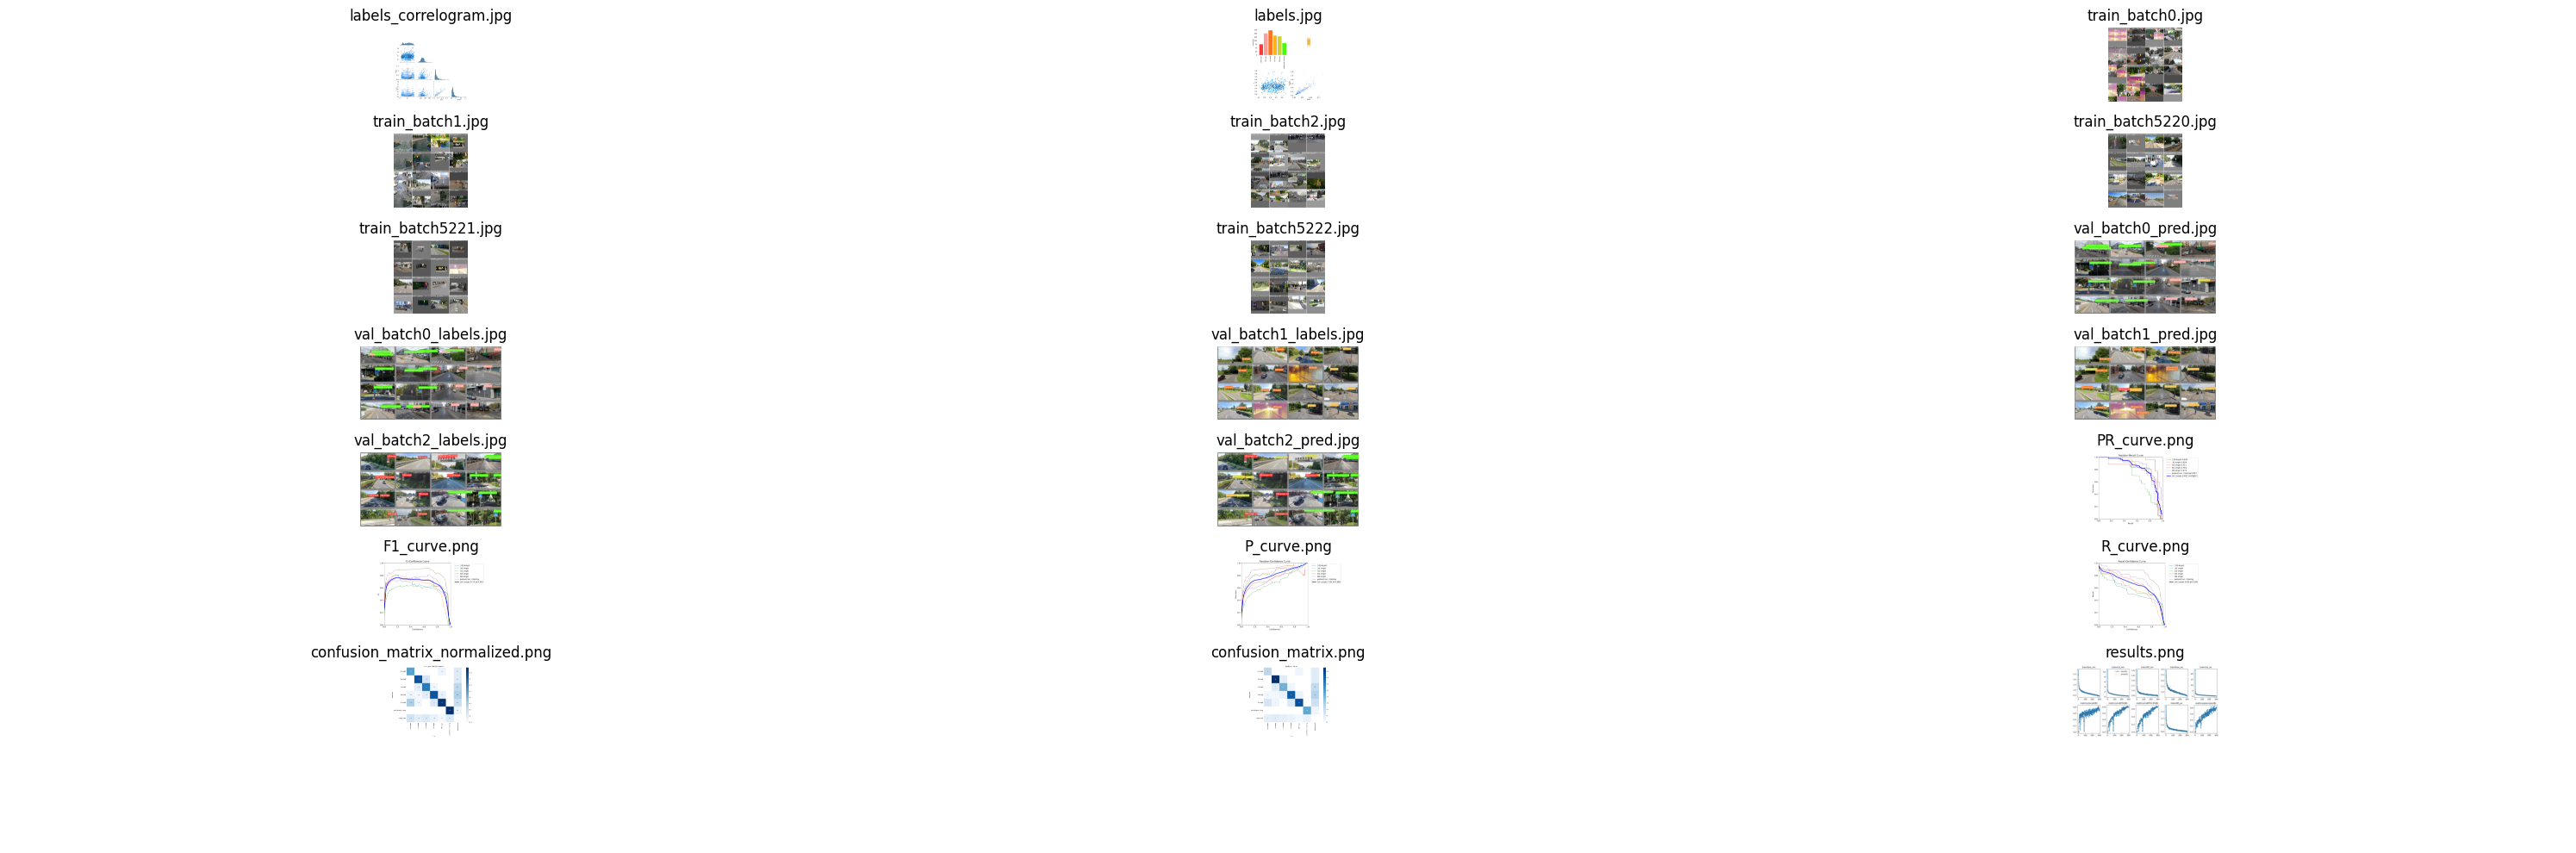

In [8]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the directory where your files are located
directory = '/content/drive/MyDrive/Combinations/32/runs/detect/train'

# Get a list of all jpg and png files in the directory
image_files = [f for f in os.listdir(directory) if f.endswith(('.jpg', '.png'))]

# Set up the plot with larger size for images (double the original size)
fig, axes = plt.subplots(nrows=len(image_files) // 3 + 1, ncols=3, figsize=(30, 10))  # Increased figsize
axes = axes.flatten()

# Display each image
for i, image_file in enumerate(image_files):
    img_path = os.path.join(directory, image_file)
    img = mpimg.imread(img_path)
    axes[i].imshow(img)
    axes[i].axis('off')  # Turn off axis for better viewing
    axes[i].set_title(image_file)

# Hide any empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()